# Change of Measure,Convexity and Linear Rate Model
## Libor in arrears
Wolfram Boenkost, Wolfgang M. Schmidt: Notes on convexity and quanto adjustments for interest rates and related options 
https://d-nb.info/989681769/34

In [2]:
import QuantLib as ql
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
import math
import scipy.integrate as integrate
from scipy.stats import norm
from scipy.stats import lognorm
% matplotlib inline

## Model free part

### Tradable Securities

$P(t,T)$ where $t<T$ 

$ - P(t,T_2)$ Numeraire and $Q_{T_2}$ such that $\frac{P(t,T_1)}{P(t,T_2)}$ is $Q_{T_2}$-Martingale $t<T_1<T_2$

$ - L(t,T_1,T_2)=\frac{\frac{P(t,T_1)}{P(t,T_2}-1}{\Delta}$ is $ Q_{T_2}$-Martingale


$ - E^{Q_{T_2}}( L(T_1,T_1,T_2)|\mathcal{F_t})=\frac{E^{Q_{T_2}}(\frac{P(T_1,T_1)}{P(T_1,T_2)}\mathcal{F_t})-1}{\Delta} =\frac{\frac{P(t,T_1)}{P(t,T_2)}-1}{\Delta}$ 



### Payoffs







- Libor Floater: $ V_t(\Delta L(T_1,T_2)) = P(t,T_2) E^{Q_{T_2}}(\Delta L(T_1,T_2)|\mathcal{F_t})= P(t,T_2) \Delta L(t,T_1,T_2)$ 

- Libor InArears Floater: $ V_t(\Delta L(T_1,T_2)@T_1) = P(t,T_1) E^{Q_{T_1}}(\Delta L(T_1,T_2)  @ T_1|\mathcal{F_t})= ?$ 



##### Measure transformation between $Q_{T_1}$ and $Q_{T_2}$

$ M(t)=\left. \frac{dQ_{T_1}}{dQ_{T_2}}\right|_{t}=E^{Q_{T_2}}(\frac{P(T_1,T_1)}{P(T_1,T_2)}|\mathcal{F_t}) = \frac{P(t,T_1)}{P(t,T_2)} $ is a $Q_{T_2}$-Matringale



##### Expectation of  $L(T_1,T_2) $
under measure $Q_{T_1}$

$E^{Q_{T_1}}(L(T_1,T_2)|\mathcal{F_t})=  \frac{1}{M(t)} E^{Q_{T_2}}(M(T_1) L(T_1,T_2)|\mathcal{F_t}) = \frac{P(t,T_2)}{P(t,T_1)}  E^{Q_{T_2}}(\frac{ L(T_1,T_2)}{P(T_1,T_2)} |\mathcal{F_t})=E^{Q_{T_2}}( \frac{L(T_1,T_2)(1+\Delta L(T_1,T_2))}{1+ \Delta L(t,T_1,T_2)} |\mathcal{F_t})= L(t,T_1,T_2) (1+\frac{\Delta Var^{Q{T_2}}(L(T_1,T_2)|\mathcal{F_t})}{L(t,T_1,T_2) (1 + \Delta L(t,T_1,T_2))})$



##### Distribution of $L(T_1,T_2)$ under measure $Q_{T_1}$
$Q_{T_1}(L(T_1,T_2) \in A|\mathcal{F_t})=E^{Q_{T_2}}(1_{L(T_1,T_2) \in A}|\mathcal{F_t})$
$=  E^{Q_{T_2}}(1_{L(T_1,T_2) \in A} \frac{M(T_1)}{M(t)}|\mathcal{F_t})$
$= \int_{L(T_1,T_2) \in A}\int_{M(T_1) \in \mathbb{R}} \frac{M(T_1)}{M(t)}1_{L(T_1,T_2) \in A}\cdot p^{Q^{T_1}}_{L(T_1,T_2),M(T_1)}(l,m) dm dl$


##### Linear Approximation of measure $Q_{T_1}$


Assume that $E^{Q_{T_2}}(\frac{M(T_1)}{M(t)}|L(T_1,T_2),\mathcal{F_t})\approx (\alpha_0(t,T) + \alpha_1(t,T) \cdot L(T_1,T_2)) $ i.e. linear approxomation

$E^{Q_{T_1}}(L(T_1,T_2))= E^{Q_{T_2}}(\frac{M(T_1)}{M(t) }L(T_1,T_2)|\mathcal{F_t})=E^{Q_{T_2}}(E^{Q_{T_2}}(\frac{M(T_1)}{M(t) }|L(T_1,T_2))\cdot L(T_1,T_2)|\mathcal{F_t})\approx E^{Q_{T_2}}((\alpha_0(t,T_1) + \alpha_1(t,T_1) L(T_1,T_2)) \cdot L(T_1,T_2)|\mathcal{F_t})$



where $\left(\begin{matrix}a_0(t,T_1)\\a_1(t,T_1)\end{matrix}\right)= argmin_{(a_0,a_1)} \lVert\frac{M(T_1)}{M(t)}-\alpha_0(t,T_1) - \alpha_1(t,T_1) L(T_1,T_2) |\mathcal{F_t})\rVert_2 = argmin_{(a_0,a_1)}(Var^{Q^{T_2}}(\frac{M(T_1)}{M(t)}-\alpha_0(t,T_1) - \alpha_1(t,T_1) L(T_1,T_2) |\mathcal{F_t}))$

### Calculate the RN-derivative by orthogonal projection

$(\frac{M(T_1)}{M(t)}-\alpha_0(t,T_1) - \alpha_1(t,T_1) L(T_1,T_2)) \bot span\{1,L(T_1,T_2)\}$



$\left(\begin{matrix} 0\\0 \end{matrix}\right) =E^{Q_{T_2}}(\left(\begin{matrix}1 & 0\\0 &L(T_1,T_2)\end{matrix}\right)\left(\begin{matrix} \frac{M(T_1)}{M(t)}-\alpha_0(t,T_1) - \alpha_1(t,T_1) L(T_1,T_2)\\\frac{M(T_1)}{M(t)}-\alpha_0(t,T_1) - \alpha_1(t,T_1) L(T_1,T_2) \end{matrix}\right)|\mathcal{F_t})$

$\left(\begin{matrix} 0\\0 \end{matrix}\right) =\left(\begin{matrix} E^{Q_{T_2}}(\frac{M(T_1)}{M(t)}|\mathcal{F_t})-E^{Q_{T_2}}(\alpha_0(t,T_1)|\mathcal{F_t}) - E^{Q_{T_2}}(\alpha_1(t,T_1) L(T_1,T_2)|\mathcal{F_t})\\E^{Q_{T_2}}(\frac{M(T_1)}{M(t)}L(T_1,T_2)|\mathcal{F_t})-E^{Q_{T_2}}(\alpha_0(t,T)L(T_1,T_2)|\mathcal{F_t}) - E^{Q_{T_2}}(
\alpha_1(t,T_1) L(T_1,T_2)^2|\mathcal{F_t}) \end{matrix}\right)$

### Solve for $\alpha_1,\alpha_2$

$\left(\begin{matrix} E^{Q^{T_2}}(\frac{M(T_1)}{M(t)}|\mathcal{F_t})\\E^{Q_{T_2}}(\frac{M(T_1)}{M(t)}L(T_1,T_2)|\mathcal{F_t}) \end{matrix}\right) =\left(\begin{matrix} E^{Q_{T_2}}(1|\mathcal{F_t}) & E^{Q_{T_2}}( L(T_1,T_2)|\mathcal{F_t})\\E^{Q_{T_2}}(L(T_1,T_2)|\mathcal{F_t}) & E^{Q_{T_2}}(L(T_1,T_2)^2|\mathcal{F_t}) \end{matrix}\right) \left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_2) \end{matrix}\right)$


$\left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_1) \end{matrix}\right)
=\left(\begin{matrix} 1 & E^{Q_{T_2}}( L(T_1,T_2)|\mathcal{F_t})\\E^{Q_{T_2}}(L(T_1,T_2)|\mathcal{F_t}) & E^{Q_{T_2}}(L(T_1,T_2)^2|\mathcal{F_t}) \end{matrix}\right)^{⁻1}\left(\begin{matrix} 1\\E^{Q_{T_2}}(\frac{M(T_1)}{M(t)}L(T_1,T_2)|\mathcal{F_t}) \end{matrix}\right)$

$\left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_1) \end{matrix}\right)
=\frac{1}{Var^{Q_{T_2}}(L(T_1,T_2)|\mathcal{F_t})}\left(\begin{matrix} E^{Q_{T_2}}(L(T_1,T_2)^2|\mathcal{F_t}) & -E^{Q_{T_2}}( L(T_1,T_2)|\mathcal{F_t}) \\-E^{Q_{T_2}}( L(T_1,T_2)|\mathcal{F_t}) & 1 \end{matrix}\right)\left(\begin{matrix} 1\\E^{Q_{T_2}}(\frac{M(T_1)}{M(t)}L(T_1,T_2)|\mathcal{F_t}) \end{matrix}\right)$



##### Plug in Expectation of  $ L(T_1,T_2)$
$ E^{Q_{T_2}}(L(T_1,T_2)|\mathcal{F_t})= L(t,T_1,T_2)$

$ E^{Q_{T_1}}(L(T_1,T_2)|\mathcal{F_t})=  \frac{1}{M(t)} E^{Q_{T_2}}(M(T_1) L(T_1,T_2)|\mathcal{F_t}) = L(t,T_1,T_2) (1+\frac{\Delta Var^{Q{T_2}}(L(T_1,T_2)|\mathcal{F_t})}{L(t,T_1,T_2) (1 + \Delta L(t,T_1,T_2))})$

$\left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_1) \end{matrix}\right)
=\frac{1}{Var^{Q_{T_2}}(L(T_1,T_2)|\mathcal{F_t})}\left(\begin{matrix} E^{Q_{T_2}}(L(T_1,T_2)^2|\mathcal{F_t}) & - L(t,T_1,T_2) \\-L(t,T_1,T_2) & 1 \end{matrix}\right)\left(\begin{matrix} 1\\L(t,T_1,T_2) (1+\frac{\Delta Var^{Q{T_2}}(L(T_1,T_2)|\mathcal{F_t})}{L(t,T_1,T_2) (1 + \Delta L(t,T_1,T_2))}) \end{matrix}\right)$

$\left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_1) \end{matrix}\right)
=\frac{1}{Var^{Q_{T_2}}(L(T_1,T_2)|\mathcal{F_t})}\left(\begin{matrix} Var^{Q_{T_2}}(L(T_1,T_2)|\mathcal{F_t}) - \frac{\Delta Var^{Q{T_2}}(L(T_1,T_2)|\mathcal{F_t})}{ (1 + \Delta L(t,T_1,T_2))} \\ \frac{\Delta Var^{Q{T_2}}(L(T_1,T_2)|\mathcal{F_t})}{ (1 + \Delta L(t,T_1,T_2))} \end{matrix}\right)$



$\left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_1) \end{matrix}\right)
=\left(\begin{matrix} 1- \frac{1}{ (1 + \Delta L(t,T_1,T_2))} \\ \frac{\Delta }{ (1 + \Delta L(t,T_1,T_2))} \end{matrix}\right)$

#### Expectation Black

$L(T_1,T_2) = L(0,T_1,T_2) exp(-\frac{\sigma^2}{2}T_1+\sigma W_{T_1})$
- $ E^{Q_{T_2}}(L(T_1,T_2)) = L(0,T_1,T_2)$
- $ E(\exp( \sigma W_{T_1})) = \exp( \frac{\sigma^2}{2} T_1))$
- $ E^{Q_{T_2}}(L(T_1,T_2)^2) = L(0,T_1,T_2)^2 exp(-\sigma^2 T_1) E^{Q_{T_2}}exp(2 \sigma W_{T_1}) = L(0,T_1,T_2)^2 exp(-\sigma^2 T_1) exp(2 \sigma^2 T_1)= L(0,T_1,T_2)^2 exp( \sigma^2 T_1)$
- $ Var^{Q_{T_2}}(L(T_1,T_2)) = L(0,T_1,T_2)^2 (exp( \sigma^2 T_1)-1)$

$E^{Q_{T_1}}(L(T_1,T_2))= L(0,T_1,T_2) (1+\frac{\Delta L(0,T_1,T_2) (exp( \sigma^2 T_1)-1)}{1 + \Delta L(0,T_1,T_2)})$

#### Expectation Bachelier


$L(t,T_1,T_2) = L(0,T_1,T_2)  \sigma W_t$
- $ E^{Q_{T_2}}(L(T_1,T_2)) = L(0,T_1,T_2)$
- $ E^{Q_{T_2}}(L(T_1,T_2)^2) = E^{Q_{T_2}}(L(0,T_1,T_2)^2 \sigma^2 W^2_{T_1}) = L(0,T_1,T_2)^2 \sigma^2 T_1$
- $ Var^{Q_{T_2}}(L(T_1,T_2)) = L(0,T_1,T_2)^2 ( \sigma^2 T_1 -1)$

$E^{Q_{T_1}}(L(T_1,T_2)|\mathcal{F_t})= L(t,T_1,T_2) (1+\frac{\Delta L(0,T_1,T_2) (\sigma^2 t-1)}{1 + \Delta L(t,T_1,T_2)})$

In [1]:
ccrates = lambda t: 0.05 + 0.00 * math.sqrt(t)
sigma=0.2
delta=0.5
def B(t,T):    
    if t>T:
        return np.nan
    return math.exp(-ccrates(T-t)*(T-t))

def Forward(t, T1,T2):
    return 0.05
    #return (B(t,T1)/B(t,T2) - 1) /(T2 - T1)
def ConvexityBlack(sigma,forward,delta,time):
    return  delta * forward * forward/(1+delta*forward)* (math.exp(sigma*sigma * time)-1)
   
    
xrange = np.arange(0,30,1)
fig, ax1 = plt.subplots()

ax1.plot(xrange, 
         [Forward(0,time,time+delta) for time in xrange],
         'b-')
ax1.plot(xrange, 
         [Forward(0,time,time+delta) + ConvexityBlack(sigma,Forward(0,time,time+delta),delta,time)for time in xrange],
         'r-')
#ax2 = ax1.twinx()
#ax2.plot(xrange, [ConvexityBlack(sigma,Forward(0,time,time+delta),delta,time) for time in xrange],
#         'g-')

ax1.set_xlabel('Maturity')
ax1.set_ylabel('Forward', color='b')

plt.show()



NameError: name 'np' is not defined

# Analytic

# Distribution  of $L(T_1,T_2) under Q^{T_1}$


$Q^{T_1}(L(T_1,T_2) \in A |\mathcal{F_t}) =E^{Q_{T_2}}(\frac{M(T)}{M(t)} 1_{L(T_1,T_2) \in A} |\mathcal{F_t}) = E^{Q_{T_2}}(E^{Q_{T_2}}(\frac{M(T)}{M(t)}|L(T_1,T_2), \mathcal{F_t}) 1_{L(T_1,T_2) \in A} |\mathcal{F_t}) \approx E^{Q_{T_2}}((\alpha_0(t,T)+ \alpha_1(t,T)L(T_1,T_2)) 1_{L(T_1,T_2) \in A} |\mathcal{F_t}) =\int_A((\alpha_0(t,T) + \alpha_1(t,T) s) \cdot p^{Q^{T_2}}(s) ds)$

$ p^{Q^{T_1}}(s) =(\alpha_0(t,T) + \alpha_1(t,T) s) \cdot p^{Q^{T_2}}(s)$

$\left(\begin{matrix} \alpha_0(t,T_1)\\\alpha_1(t,T_1) \end{matrix}\right)
=\left(\begin{matrix} 1- \frac{1}{ (1 + \Delta L(t,T_1,T_2))} \\ \frac{\Delta }{ (1 + \Delta L(t,T_1,T_2))} \end{matrix}\right)$



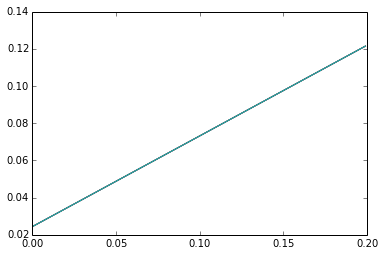

In [ ]:
def alpha_0(t,T1,T2):
    if t>T2:
        return np.nan
    num = 1
    denom =  1+ (T2-T1) * Forward(1,T1,T2)
    return 1- num/denom

def alpha_1(t,T1,T2):
    if t>T2:
        return np.nan
    num = T2-T1
    denom =  1+ (T2-T1)  * Forward(1,T1,T2)
    return num/denom



def L(T1,T2):   
    mu = math.log(Forward(0,T1,T2)) - sigma*sigma*T1/2
    l = lognorm(s=sigma*sigma*T1, loc=0, scale=math.exp(mu))
    return l
   
T1=10
T2=T1+delta


plt.plot(np.arange(0,0.2,0.001), [L(T1,T2).pdf(s) for s in np.arange(0,0.2,0.001)],label="Q^C_T")
for vola in [0,0.1,0.2,0.4]:
    plt.plot(np.arange(0,0.2,0.001), [(alpha_0(0,T1,T2) +alpha_1(0,T1,T2)*s) 
                                    for s in np.arange(0,0.2,0.001)],label="")

    